In [1]:

%matplotlib inline

# Import dependencies
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt


file = os.path.join('MidwestMurderData.csv')
midwest_homicide_df = pd.read_csv(file)
midwest_homicide_df.columns

Index(['index', 'ID', 'CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype',
       'Source', 'Solved', 'Year', 'StateName', 'Month', 'Incident',
       'ActionType', 'Homicide', 'Situation', 'VicAge', 'VicSex', 'VicRace',
       'VicEthnic', 'OffAge', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon',
       'Relationship', 'Circumstance', 'Subcircum', 'VicCount', 'OffCount',
       'FileDate', 'fstate', 'MSA'],
      dtype='object')

In [2]:
relationship_df = midwest_homicide_df[['Relationship', 'VicSex','Weapon', 'OffSex']]
relationship_df['Weapon'].unique()

array(['Knife or cutting instrument', 'Handgun - pistol, revolver, etc',
       'Shotgun', 'Strangulation - hanging',
       'Personal weapons, includes beating',
       'Blunt object - hammer, club, etc', 'Rifle',
       'Other or type unknown', 'Firearm, type not stated', 'Fire',
       'Asphyxiation - includes death by gas', 'Drowning',
       'Pushed or thrown out window',
       'Narcotics or drugs, sleeping pills', 'Explosives', 'Other gun',
       'Poison - does not include gas'], dtype=object)

In [3]:
#Combine similar weapons together
relationship_df['Weapon'] = relationship_df['Weapon'].replace(
                                                {"Knife or cutting instrument": "Close Contact",
                                                "Handgun - pistol, revolver, etc": "No/Little Contact",
                                                "Shotgun": "No/Little Contact",
                                                "Strangulation - hanging": "No/Little Contact",
                                                "Personal weapons, includes beating": "Close Contact",
                                                "Blunt object - hammer, club, etc" : "Close Contact",
                                                "Rifle": "No/Little Contact",
                                                "Firearm, type not stated": "No/Little Contact",
                                                "Asphyxiation - includes death by gas": "Close Contact",
                                                "Other gun": "No/Little Contact",
                                                "Fire": "No/Little Contact",
                                                "Drowning": "Close Contact",
                                                "Pushed or thrown out window": "No/Little Contact",
                                                "Narcotics or drugs, sleeping pills": "No/Little Contact",
                                                "Explosives": "No/Little Contact",
                                                "Poison - does not include gas": "No/Little Contact"})

#Combine similar relationships together
relationship_df['Relationship'] = relationship_df["Relationship"].replace(
                                                  {'Brother': 'Sibling',
                                                   'Sister': 'Sibling',
                                                   'Father': 'Parent',
                                                   'Mother': 'Parent',
                                                   'Daughter': 'Child',
                                                   'Son': 'Child',
                                                   'Stepson': 'Child',
                                                   "Stepdaughter": "Child",
                                                   "Homosexual relationship": 'Partner',
                                                   "Boyfriend" : "Partner",
                                                   "Girlfriend" : "Partner",
                                                   "Common-law husband" : "Partner",
                                                   "Common-law wife" : "Partner",
                                                   "Ex-husband" : "Spouse",
                                                   "Ex-wife" : "Spouse",
                                                   "Stepmother" : "Parent",
                                                   "Stepfather" : "Parent",
                                                   "Husband" : "Spouse",
                                                   "Wife" : "Spouse",
                                                  "Friend": 'Other - known to victim',
                                                  "Neighbor": 'Other - known to victim',
                                                  "Employee": 'Other - known to victim',
                                                  "Employer": 'Other - known to victim',
                                                  "In-law" : 'Other - known to victim'})

C:\Users\write\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\write\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
#Female Datafarme - pull out only female victims
victims_df = relationship_df[['Relationship', 'VicSex']]
female_victims = victims_df.loc[victims_df["VicSex"]=='Female', :]

#Group Female Victims by Relationships
female_victims = female_victims.groupby('Relationship').count()

#Rename columns
female_victims_df = female_victims.rename(columns={"VicSex": "Female Victim"})

#Sort values so graphs are in ascending order
female_df = female_victims_df.reset_index().sort_values("Female Victim")

#Drop the highest outlier value: Relationship Undefined
female_df = female_df.drop(6)

#Unsort female df for double bar chart
unsort_female_df = female_victims_df.reset_index().drop(6)


In [5]:
#Find the sum of all Female Victims
female_df.sum()

Relationship     SiblingOther familyParentChildStrangerOther - ...
Female Victim                                                23810
dtype: object

In [6]:
#Calculate the percentage of female victims by relationship (23810 is the sum of all female victims)
female_percent = female_df['Female Victim']/23810*100
female_percent = female_percent.round()

In [7]:
# #Unsorted for double bar chart
# unsort_female_percent = unsort_female_df['Female Victim']/23810*100
# unsort_female_percent = unsort_female_percent.round()


In [8]:
#Male Dataframe - Pull out only Male Victims
male = victims_df.loc[victims_df["VicSex"] == "Male", :]

#Group Male Victims by Relationships
male_victims = male.groupby('Relationship').count()

#Rename Columns
male_victims_df = male_victims.rename(columns={"VicSex": "Male Victim"})


#Sort values so graphs are in ascending order
male_df = male_victims_df.reset_index().sort_values("Male Victim")

#Drop the highest outlier value: Relationship Undefined
male_df = male_df.drop(6)

#Unsort male df for double bar chart
# unsort_male_df = male_victims_df.reset_index().drop(6)

In [9]:
#Find the sum of all Male Victims
male_df.sum()

Relationship    SiblingParentOther familySpouseChildPartnerOth...
Male Victim                                                 63925
dtype: object

In [10]:
#Calculate the percentage of male victims by relationship (23810 is the sum of all female victims)
male_percent = male_df['Male Victim']/63925*100
male_percent = male_percent.round()

In [11]:
# #Unsorted for double bar chart
# unsort_male_percent = unsort_male_df['Male Victim']/63925*100
# unsort_male_percent = unsort_male_percent.round()


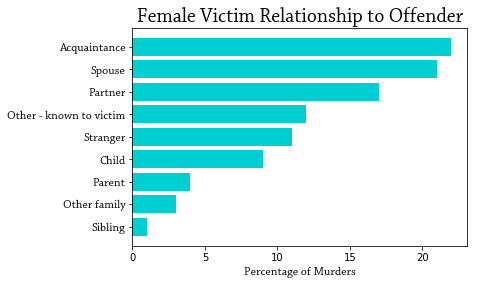

In [12]:
#Plot Female Victim Relationship Information
y_axis = np.arange(len(female_percent))
tick_locations = [value for value in y_axis]

#plt.figure(figsize=(20,3))
plt.barh(y_axis, female_percent, color='darkturquoise', alpha= 1.0, align="center")
plt.yticks(tick_locations, female_df["Relationship"], fontname='Chaparral Pro', 
           fontsize=12, rotation="horizontal")

# Set a Title and labels
plt.title("Female Victim Relationship to Offender", fontname='Chaparral Pro', fontsize=20)
plt.xlabel("Percentage of Murders", fontname='Chaparral Pro', fontsize=12)
plt.show()

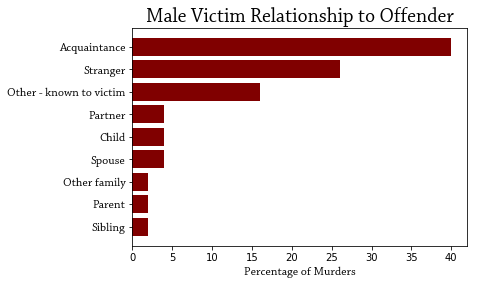

In [13]:
#Plot Male Victim Relationship Information
y_axis = np.arange(len(male_percent))
tick_locations = [value for value in y_axis]

#plt.figure(figsize=(20,3))
plt.barh(y_axis, male_percent, color='maroon', alpha= 1.0, align="center")
plt.yticks(tick_locations, male_df["Relationship"], fontname='Chaparral Pro', 
           fontsize=12, rotation="horizontal")

# Set a Title and labels
plt.title("Male Victim Relationship to Offender", fontname='Chaparral Pro', fontsize=20)
plt.xlabel("Percentage of Murders", fontname='Chaparral Pro', fontsize=12)
plt.show()

In [14]:
##GROUP WEAPON TYPE AND VICTIM RELATIONSHIP##
#Further group relationships based on intimacy
intimate = relationship_df[['Relationship', 'Weapon']]
intimate['Relationship'] = intimate['Relationship'].replace(
                                            {'Acquaintance': 'Aquaintance/Stranger',
                                            'Spouse': 'Romantic Partner',
                                            'Stranger': 'Aquaintance/Stranger',
                                            'Sibling': 'Family Member',
                                            'Parent': 'Family Member',
                                            'Child': 'Family Member',
                                            'Partner': 'Romantic Partner',
                                            'Other family': 'Family Member'})

#Find only the intimate weapon types grouped by relationship
intimate = intimate[intimate.Weapon == 'Close Contact'].groupby('Relationship').count()
intimate = intimate.rename(columns={'Weapon': 'Intimate Murder'})

#Group together the detached weapon types by relationship
detached= relationship_df[['Relationship', 'Weapon']]

#Adjust relationship groups to reflect aquaintance/stranger, family, and romantic partner
detached['Relationship'] = detached['Relationship'].replace(
                                            {'Acquaintance': 'Aquaintance/Stranger',
                                            'Spouse': 'Romantic Partner',
                                            'Stranger': 'Aquaintance/Stranger',
                                            'Sibling': 'Family Member',
                                            'Parent': 'Family Member',
                                            'Child': 'Family Member',
                                            'Partner': 'Romantic Partner',
                                            'Other family': 'Family Member'})

#Group detached weapons by relationshps
detached = detached[detached.Weapon == 'No/Little Contact'].groupby('Relationship').count()
detached = detached.rename(columns={'Weapon': 'Detached Murder'})


#Merge the two types of weapons together based on relationship, reset index, drop "relatioship not determined"
weapon_type = pd.merge(intimate, detached, how='outer', on=['Relationship']).reset_index()
weapon_type = weapon_type.drop(2)
weapon_type = weapon_type.drop(3)

#Get counts for reach murder type for aquaintance, family member, and romantic partner
intimate_murder = weapon_type['Intimate Murder']
detached_murder = weapon_type['Detached Murder']

C:\Users\write\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\write\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


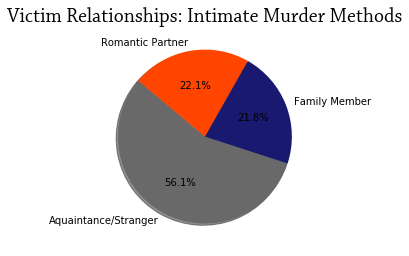

In [15]:
#Create close contact murder pie chart
relationship = ['Aquaintance/Stranger', 'Family Member', 'Romantic Partner']
count = [12463, 4844, 4909]
colors = ["dimgray", "midnightblue", "orangered"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(count, labels=relationship, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Victim Relationships: Intimate Murder Methods", fontname='Chaparral Pro', fontsize=20)
plt.show()

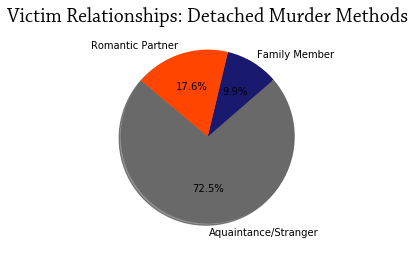

In [16]:
relationship = ['Aquaintance/Stranger', 'Family Member', 'Romantic Partner']
count = [35717, 4881, 8679]
colors = ["dimgray", "midnightblue", "orangered"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(count, labels=relationship, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Victim Relationships: Detached Murder Methods", fontname='Chaparral Pro', fontsize=20)
plt.show()